<a href="https://colab.research.google.com/github/ShaflaRehman/Audio-Classification/blob/main/SNS_PROJECT_MARIA_SHAFLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/UrbanSound8K'  # Dataset location
metadata_file = os.path.join(data_path, 'UrbanSound8K.csv')  # Metadata file path
metadata = pd.read_csv(metadata_file)  # Load metadata
print(metadata.head())  # View first 5 rows

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [ ]:
# List to store features and labels
features = []
labels = []

target_sampling_rate = 22050

# Loop through each row in metadata
for index, row in metadata.iterrows():
    # File path for each audio clip
    file_path = os.path.join(data_path, f"fold{row['fold']}", row['slice_file_name'])

    # Load audio file and resample it to the target sampling rate
    audio, sr = librosa.load(file_path, sr=target_sampling_rate)

    # Normalize audio to avoid overflow
    audio = librosa.util.normalize(audio)


    # Extract features after filtering
    rms = librosa.feature.rms(y=audio).mean()
    zcr = librosa.feature.zero_crossing_rate(y=audio).mean()

    # Adjust n_mels and fmax to avoid empty filters in MFCC extraction
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20, n_mels=40, fmax=sr/2)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Combine all features
    feature_set = np.hstack((rms, zcr, mfccs_mean))
    features.append(feature_set)
    labels.append(row['classID'])

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels for multi-class classification
y_one_hot = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded)))

# Save features and labels to .npy files for later use
np.save('/content/drive/MyDrive/features2.npy', X)
np.save('/content/drive/MyDrive/labels2.npy', y_one_hot)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


features_file = os.path.join(data_path, 'Copy of features2.npy')  # Metadata file path
labels_file = os.path.join(data_path, 'Copy of labels2.npy')  # Metadata file path
features = np.load(features_file)  # Load the features from the file
labels = np.load(labels_file)  # Load the labels from the file
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Scale the features



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
print(features[:5]);

[[ 1.28257185e-01  1.23465402e-01 -1.08083336e+02  3.81803703e+01
  -6.66305771e+01 -3.33314362e+01 -7.45419598e+00 -1.73957672e+01
  -1.43968081e+00  4.12382030e+00  9.37879467e+00  5.74737167e+00
  -6.35719359e-01 -1.68038294e-01 -5.00823879e+00  3.24709702e+00
   1.07277894e+00 -3.07174754e+00 -6.10660028e+00 -7.00980842e-01
   2.60732919e-01  3.12415123e+00]
 [ 1.47203460e-01  1.38779128e-01 -2.70097065e+01  5.37128448e+01
  -2.51978416e+01  2.66568851e+01  5.73111486e+00  3.13863444e+00
   6.23114347e+00 -1.03535689e-01  5.03176928e+00  4.85183090e-01
  -5.83062828e-01  5.77230549e+00 -1.25508511e+00  3.21992898e+00
   3.55765486e+00 -6.13100566e-02  2.05123210e+00  2.42107725e+00
   1.02917798e-01  5.33008218e-01]
 [ 1.86498880e-01  1.02002800e-01 -1.93082333e+01  6.18432884e+01
  -2.20985870e+01  2.23503819e+01  4.33034468e+00  7.73294258e+00
   9.54495430e+00 -3.14111739e-01  5.00976086e+00  7.46816635e-01
  -1.70679605e+00  3.05409193e+00  1.46409583e+00  2.86108637e+00
   3.0

In [ ]:
num_labels = 10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the model
model = Sequential()

#input
model.add(Dense(120, input_shape=(22,)))
model.add(Activation('relu'))
model.add(BatchNormalization())  # Added Batch Normalization
model.add(Dropout(0.3))          # Reduced Dropout

# Ist hidden layer
model.add(Dense(240))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd hidden layer (final layer)
model.add(Dense(120))  # Balanced neuron count
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(num_labels))  # num_labels = number of output classes
model.add(Activation('softmax'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)  # Reduced learning rate
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Fit the model with an increased batch size
epochscount = 300  # Reduced epochs to avoid overtraining
num_batch_size = 64  # Increased batch size
model.fit(X_train, y_train,
          batch_size=num_batch_size,
          epochs=epochscount,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping],
          verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2443 - loss: 2.4533 - val_accuracy: 0.4648 - val_loss: 1.5711
Epoch 2/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4212 - loss: 1.7558 - val_accuracy: 0.5976 - val_loss: 1.2571
Epoch 3/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4724 - loss: 1.5679 - val_accuracy: 0.6216 - val_loss: 1.1707
Epoch 4/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5200 - loss: 1.4241 - val_accuracy: 0.6434 - val_loss: 1.1009
Epoch 5/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5217 - loss: 1.4033 - val_accuracy: 0.6537 - val_loss: 1.0814
Epoch 6/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5390 - loss: 1.3475 - val_accuracy: 0.6646 - val_loss: 1.0349
Epoch 7/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5678 - loss: 1.2842 - val_accuracy: 0.6789 - val_loss: 0.9922
Epoch 8/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5674 - loss: 1.2400 - val_ac

In [ ]:
validation_test_set_accuracy = model.evaluate(X_test,y_test,verbose=1)
print(validation_test_set_accuracy[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8804 - loss: 0.3704
0.8883800506591797


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted class: 9
Classified as : Music


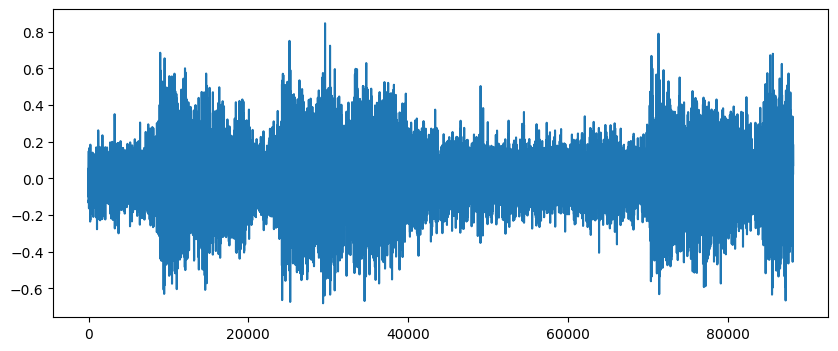

In [ ]:



def preprocess_audio(file_path, target_sampling_rate=22050):
    # Load audio file and resample it to the target sampling rate
    audio, sr = librosa.load(file_path, sr=target_sampling_rate)
    plt.figure(figsize=(10, 4))
    plt.plot(audio)
    plt.show

    # Normalize audio to avoid overflow
    audio = librosa.util.normalize(audio)

    # Extract features (RMS, ZCR, MFCCs)
    rms = librosa.feature.rms(y=audio).mean()
    zcr = librosa.feature.zero_crossing_rate(y=audio).mean()

    # Adjust n_mels and fmax to avoid empty filters in MFCC extraction
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20, n_mels=40, fmax=sr/2)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Combine all features
    feature_set = np.hstack((rms, zcr, mfccs_mean))
    return feature_set

# Load a new audio file for testing
new_audio_file_path = '/content/drive/MyDrive/UrbanSound8K/fold8/99179-9-0-12.wav'  # Replace with your file path
new_audio_features = preprocess_audio(new_audio_file_path)
new_audio_features = new_audio_features.reshape(1, -1)

# Predict the class of the new audio file
predicted_class = model.predict(new_audio_features)
predicted_class_label = np.argmax(predicted_class, axis=1)[0]

# Classify as speech, music, or noise based on predicted label
if predicted_class_label == 2:
    label = 'Speech'
elif predicted_class_label == 9:
    label = 'Music'
else:
    label = 'Noise'

# Display the predicted class
print(f'Predicted class: {predicted_class_label}')
print(f'Classified as : {label}')


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.3704
Test Accuracy: 88.84%
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.1537
Training Accuracy: 95.63%


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       203
           1       0.97      0.87      0.92        86
           2       0.74      0.82      0.78       183
           3       0.84      0.86      0.85       201
           4       0.92      0.87      0.90       206
           5       0.95      0.95      0.95       193
           6       0.83      0.89      0.86        72
           7       0.96      0.95      0.95       208
           8       0.96      0.97      0.97       165
           9       0.84      0.77      0.80       230

    accuracy                           0.89      1747
   macro avg       0.89      0.89      0.89      1747
weighted avg       0.89      0.89      0.89      1747

Confusion Matrix:
[[193   0   2   1   1   3   1   0   0   2]
 [  0  75   1   0   2   0   0   3   0   5]
 [  3   1 150   9   1   3   8   0   1   7]
 [  4   1  10 173   3   2   3   

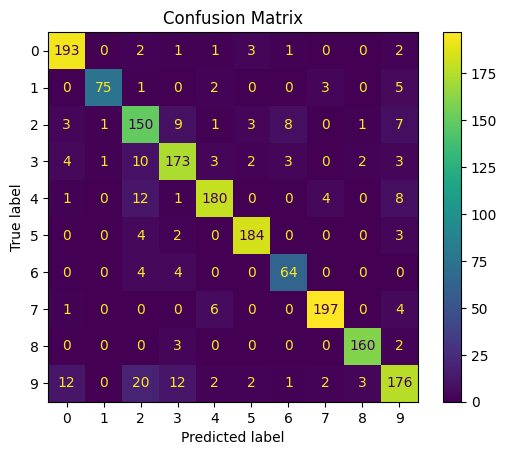

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Convert y_test to class labels if one-hot encoded
y_test_classes = np.argmax(y_test, axis=1)

# Display classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test_classes))
disp.plot(cmap='viridis')  # You can change 'viridis' to other colormaps like 'Blues'
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model in the native Keras format
model.save('/content/drive/MyDrive/UrbanSound8K/audio_classification_model.keras')


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/UrbanSound8K/audio_classification_model.keras')

# Verify the model structure
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 120)                 │           2,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 240)                 │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 240)                 │             960 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,632 (740.75 KB)

 Trainable params: 62,890 (245.66 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 125,782 (491.34 KB)

In [ ]:
print[features]

In [ ]:
print(labels[:50])


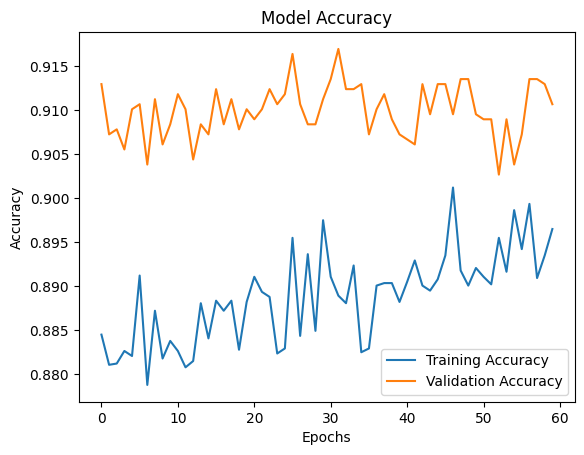

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()